In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Скачиваем данные

Скачаем данные по запратам в разных видах деятельности и оставим только интересные нам 2020-2023.

In [77]:
new_salary_df = pd.read_excel("salaries.xlsx", header=4).dropna() \
    .rename(columns=lambda col: str(col)[:4]).rename(columns={"Unna": "Tp"})
new_salary_df.Tp = list(map(lambda el: el.lower().strip(), new_salary_df.Tp))
new_salary_df.index = new_salary_df.Tp
new_salary_df = new_salary_df.drop(columns=["Tp"])

drop_rows = [
    "растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",
    "лесоводство и лесозаготовки",
    "добыча угля",
    "добыча нефти и природного газа",
    "добыча металлических руд",
    "производство пищевых продуктов",
    "производство напитков",
    "производство табачных изделий",
    "производство текстильных изделий",
    "производство одежды",
    "производство бумаги и бумажных изделий",
    "деятельность полиграфическая и копирование носителей информации",
    "производство лекарственных средств и материалов, применяемых в медицинских целях",
    "производство металлургическое",
    "производство готовых металлических изделий, кроме машин о оборудования",
    "производство компьютеров, электронных и оптических изделий",
    "производство электрического оборудования",
    "производство машин и оборудования, не включенных в другие группировки",
    "производство автотранспортных средств, прицепов и полуприцепов",
    "производство прочих транспортных средств и оборудования",
    "производство мебели",
    "производство прочих готовых изделий",
    "ремонт и монтаж машин и оборудования",
    "обеспечение электрической энергией, газом и паром; кондиционирование воздуха",
    "водоснабжение; водоотведение, организация сбора и утилизации отходов, деятельность по ликвидации загрязнений",
    "транспортировка и хранение",
    "деятельность по операциям с недвижимым имуществом",
    "деятельность профессиональная,научная и техническая",
    "из нее научные исследования и разработки",
    "деятельность административная и сопутствующие дополнительные услуги",
    "деятельность в области культуры, спорта, организации досуга и развлечений"
]

new_salary_df = new_salary_df.drop(drop_rows)

new_salary_df = new_salary_df.rename({
    "сельское, лесное хозяйство, охота, рыболовство и рыбоводство": "сельское хозяйство",
    "рыболовство и рыбоводство": "рыболовство, рыбоводство",
    "обработка древесины и производство изделий из дерева и пробки, кроме мебели, производство изделий из соломки и материалов для плетения": "обработка древесины и производство изделий из дерева",
    "производство химических веществ и химических продуктов": "химическое производство",
    "деятельность гостиниц и предприятий общественного питания": "гостиницы и рестораны",
    "деятельность в области информации и связи": "связь",
    "деятельность финансовая и страховая": "финансовая деятельность"
})

new_salary_df.head(5)

,2017,2018,2019,2020,2021,2022,2023
Tp,,,,,,,
всего,39167.0,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
сельское хозяйство,25671.1,28699.0,31727.6,34770.0,39436.8,46777.0,52868.3
"рыболовство, рыбоводство",68032.0,75766.0,88603.8,94983.0,101547.4,121726.2,139520.0
добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
обрабатывающие производства,38501.5,40722.0,43855.0,46510.0,52409.6,60438.7,71273.3


In [76]:
old_salary_df = pd.read_excel("salaries.xlsx", header=2, sheet_name="2000-2016 гг.").dropna() \
    .rename(columns=lambda col: str(col)[:4]).rename(columns={"Unna": "Tp"})
old_salary_df.Tp = list(map(lambda el: " ".join(el.lower().strip().split()), old_salary_df.Tp))
old_salary_df.index = old_salary_df.Tp
old_salary_df = old_salary_df.drop(columns=["Tp"])

old_salary_df = old_salary_df.drop([
    "добыча топливно-энергетических полезных ископаемых",
    "добыча полезных ископаемых, кроме топливно-энергетических",
    "производство пищевых продуктов, включая напитки, и табака",
    "металлургическое производство и производство готовых металлических изделий",
    "текстильное и швейное производство",
    "целлюлозно-бумажное производство; издательская и полиграфическая деятельность",
    "производство машин и оборудования",
    "производство электрооборудования, электронного и оптического оборудования",
    "производство транспортных средств и оборудования",
    "прочие производства",
    "производство и распределение электроэнергии, газа и воды",
    "транспорт и связь",
    "операции с недвижимым имуществом, аренда и предоставление услуг",
    "предоставление прочих коммунальных, социальных и персональных услуг"
])

old_salary_df = old_salary_df.rename({
    "всего по экономике": "всего",
    "сельское хозяйство, охота и лесное хозяйство": "сельское хозяйство",
    "производство кожи, изделий из кожи и производство обуви": "производство кожи и изделий из кожи",
    "оптовая и розничная торговля; ремонт автотранспортных средств, мотоциклов, бытовых изделий и предметов личного пользования": "торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов",
    "из них связь": "связь",
    "здравоохранение и предоставление социальных услуг": "деятельность в области здравоохранения и социальных услуг",
    "производство прочих неметаллических минеральных продуктов": "производство прочей неметаллической минеральной продукции",
    "государственное управление и обеспечение военной безопасности; социальное страхование": "государственное управление и обеспечение военной безопасности; социальное обеспечение"
})

old_salary_df.head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Tp,,,,,,,,,,,,,,,,,
всего,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
сельское хозяйство,985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
обрабатывающие производства,2365.2,3446.6,4439.1,5603.4,6848.9,8420.9,10198.5,12878.7,16049.9,16583.1,19078.0,21780.8,24511.7,27044.5,29511.0,31910.0,34592.0


In [78]:
assert list(new_salary_df.index) == list(old_salary_df.index)

In [79]:
salary_df = old_salary_df.merge(new_salary_df, on="Tp")
print(f"Всего {len(salary_df)} видов экономической деятельности", flush=True)
salary_df.head(5)

Всего 19 видов экономической деятельности


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Tp,,,,,,,,,,,,,,,,,,,,,
всего,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,...,32495.0,34030.0,36709.0,39167.0,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
сельское хозяйство,985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,...,17724.0,19721.0,21755.0,25671.1,28699.0,31727.6,34770.0,39436.8,46777.0,52868.3
"рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,...,37062.0,46676.0,54927.0,68032.0,75766.0,88603.8,94983.0,101547.4,121726.2,139520.0
добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,...,58959.0,63695.0,69936.0,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
обрабатывающие производства,2365.2,3446.6,4439.1,5603.4,6848.9,8420.9,10198.5,12878.7,16049.9,16583.1,...,29511.0,31910.0,34592.0,38501.5,40722.0,43855.0,46510.0,52409.6,60438.7,71273.3


Теперь скачаем для тех же лет данные по инфляции

In [83]:
infl_df = pd.read_html("infl.html")[1].iloc[1:25]
infl_df

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
1,2023,0.84,0.46,0.37,0.38,0.31,0.37,0.63,0.28,0.87,0.83,1.11,0.73,7.42
2,2022,0.99,1.17,7.61,1.56,0.12,-0.35,-0.39,-0.52,0.05,0.18,0.37,0.78,11.92
3,2021,0.67,0.78,0.66,0.58,0.74,0.69,0.31,0.17,0.60,1.11,0.96,0.82,8.39
4,2020,0.40,0.33,0.55,0.83,0.27,0.22,0.35,-0.04,-0.07,0.43,0.71,0.83,4.91
5,2019,1.01,0.44,0.32,0.29,0.34,0.04,0.20,-0.24,-0.16,0.13,0.28,0.36,3.05
6,2018,0.31,0.21,0.29,0.38,0.38,0.49,0.27,0.01,0.16,0.35,0.50,0.84,4.27
7,2017,0.62,0.22,0.13,0.33,0.37,0.61,0.07,-0.54,-0.15,0.20,0.22,0.42,2.52
8,2016,0.96,0.63,0.46,0.44,0.41,0.36,0.54,0.01,0.17,0.43,0.44,0.40,5.38
9,2015,3.85,2.22,1.21,0.46,0.35,0.19,0.80,0.35,0.57,0.74,0.75,0.77,12.91
10,2014,0.59,0.70,1.02,0.90,0.90,0.62,0.49,0.24,0.65,0.82,1.28,2.62,11.36


### Визуализация

#### Выбор данных

In [87]:
salary_df.index # посмотрим на роды деятельности

Index(['всего', 'сельское хозяйство', 'рыболовство, рыбоводство',
       'добыча полезных ископаемых', 'обрабатывающие производства',
       'производство кожи и изделий из кожи',
       'обработка древесины и производство изделий из дерева',
       'производство кокса и нефтепродуктов', 'химическое производство',
       'производство резиновых и пластмассовых изделий',
       'производство прочей неметаллической минеральной продукции',
       'строительство',
       'торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов',
       'гостиницы и рестораны', 'связь', 'финансовая деятельность',
       'государственное управление и обеспечение военной безопасности; социальное обеспечение',
       'образование',
       'деятельность в области здравоохранения и социальных услуг'],
      dtype='object', name='Tp')

In [88]:
sel_cols = ["всего", "деятельность в области здравоохранения и социальных услуг", "образование"]

sel_df = salary_df.loc[sel_cols].transpose()
sel_df.head()

Tp,всего,деятельность в области здравоохранения и социальных услуг,образование
2000,2223.4,1333.3,1240.2
2001,3240.4,1959.9,1833.0
2002,4360.3,3141.3,2927.3
2003,5498.5,3662.6,3386.6
2004,6739.5,4612.0,4203.4


#### Номинальные зарплаты

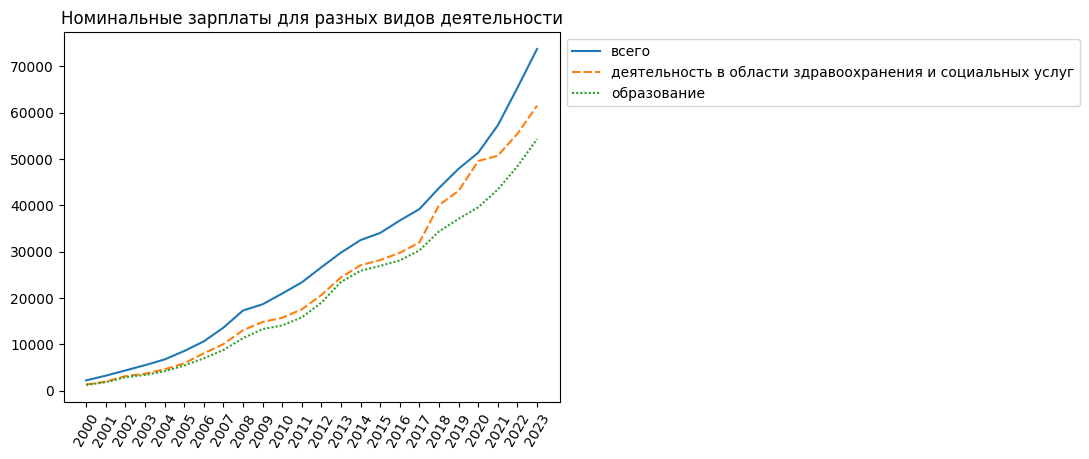

In [92]:
plt.title("Номинальные зарплаты для разных видов деятельности")
sns.lineplot(sel_df)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left");

Во всех выбранных сверах деятельности мы наблюдаем стабильный рост заработной платы со временем, что вызвано инфляцией.

#### Инфляция

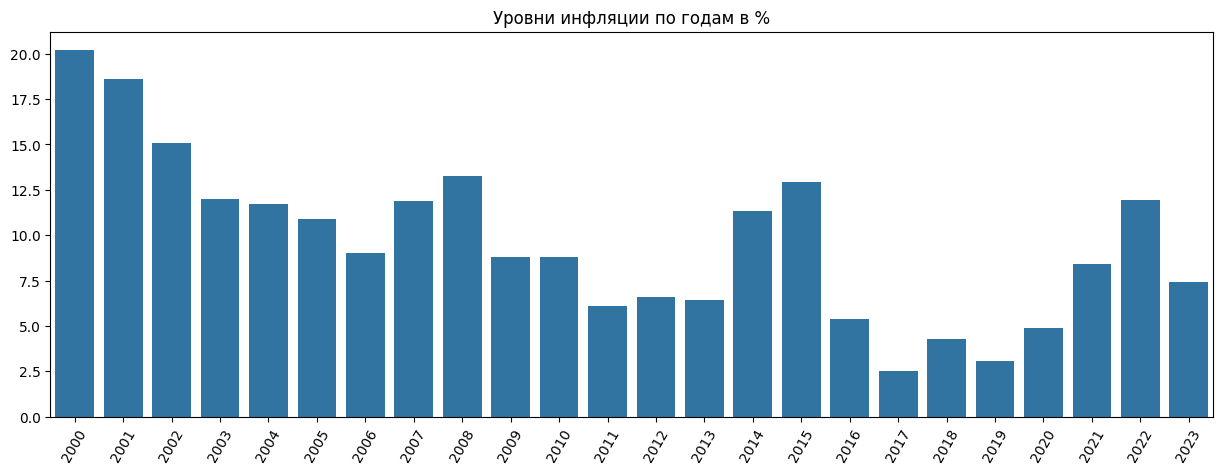

In [95]:
infl_arr = np.array(list(infl_df["Всего"])) # инфляция за 2023-2000 года соответственно
plt.gcf().set_size_inches(15, 5)
plt.title("Уровни инфляции по годам в %")
plt.xticks(rotation=60)
sns.barplot(x=range(2000, 2024), y=infl_arr[::-1]);

#### Связь с изменением номинальных зарплат

Теперь мы можем посмотреть на связь инфляции и изменения зарплат в следующем году. Мы сравниваем изменение зарплат с 2020 на 2021 с инфляцией в 2020 и т.д.

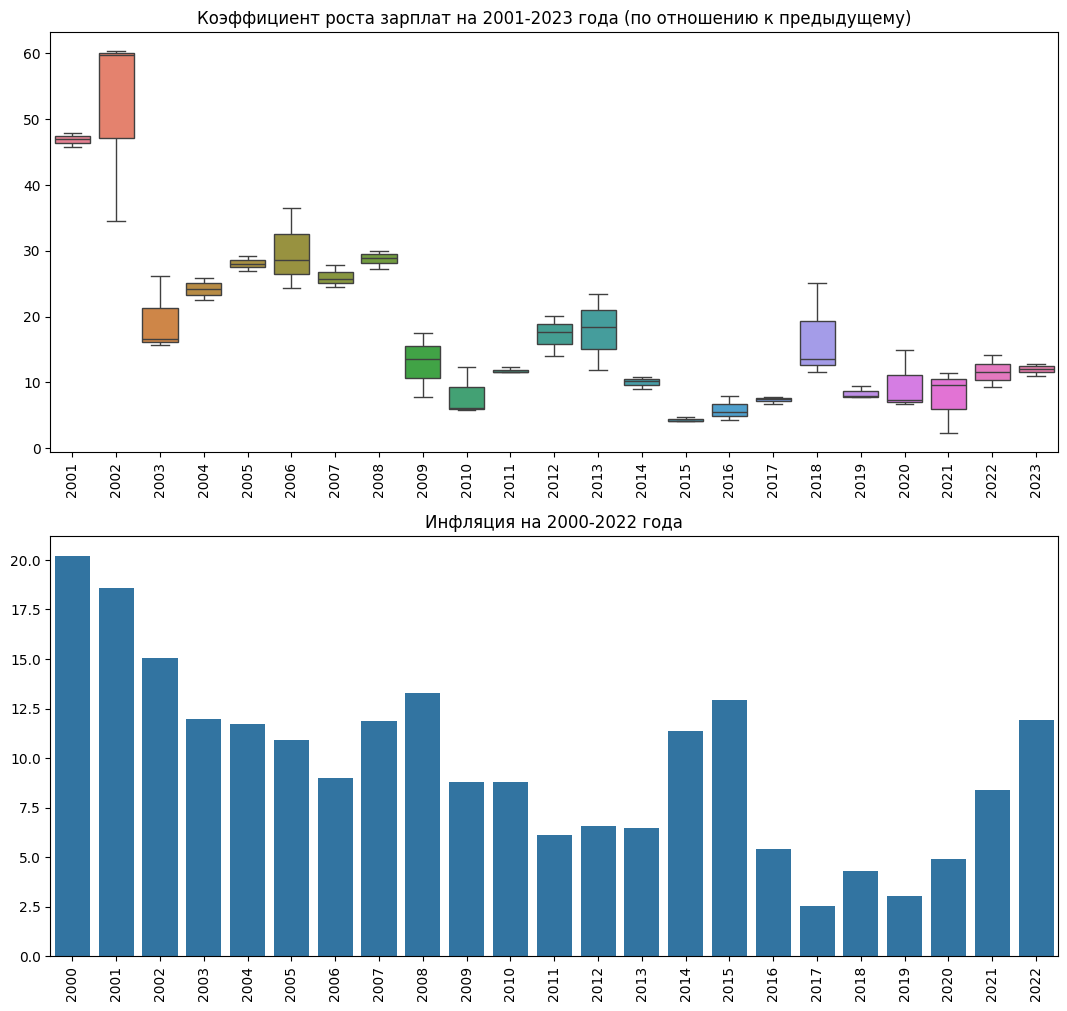

In [98]:
plt.gcf().set_size_inches(13, 12)

plt.subplot(2, 1, 1)
plt.title("Коэффициент роста зарплат на 2001-2023 года (по отношению к предыдущему)")
sns.boxplot(sel_df.pct_change().iloc[1:].transpose() * 100)
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
plt.title("Инфляция на 2000-2022 года")
plt.xticks(rotation=90)
sns.barplot(x=range(2000, 2023), y=infl_arr[::-1][:-1]);

Можно видеть, что рост зарплат достаточно точно повторяет инфляцию за предыдущий год. Выразим это в терминах корреляции

In [109]:
corr_df = pd.DataFrame(columns=["Вид деятельности", "Коэффициент корреляции"])

for name, row in (sel_df.pct_change().iloc[1:].transpose() * 100).iterrows():
    coef = np.corrcoef(row, infl_arr[::-1][:-1])[0, 1]
    corr_df.loc[len(corr_df)] = [name, coef]

corr_df

,Вид деятельности,Коэффициент корреляции
0,всего,0.704572
1,деятельность в области здравоохранения и социа...,0.586554
2,образование,0.658619


Мы получаем естественный результат: наибольшая корреляция роста цен с инфляцией у среднего уровня зарплат (по сравнению с каждым конкретным видом экономической деятельности).

#### Посмотрим на реальные зарплаты, переведя их все на уровень 2024 года

In [110]:
coef_arr = np.cumprod(1 + infl_arr / 100) # считаем коэффициенты, на которые мы умножим зарплаты, переводя их к уровню 2024 года
coef_arr

array([1.0742    , 1.20224464, 1.30311297, 1.36709581, 1.40879223,
       1.46894766, 1.50596514, 1.58698607, 1.79186597, 1.99542194,
       2.12412666, 2.26389419, 2.40199174, 2.61288661, 2.84282064,
       3.22034722, 3.60260243, 3.92683665, 4.35525453, 4.86656141,
       5.45006212, 6.27084148, 7.43596383, 8.93802852])

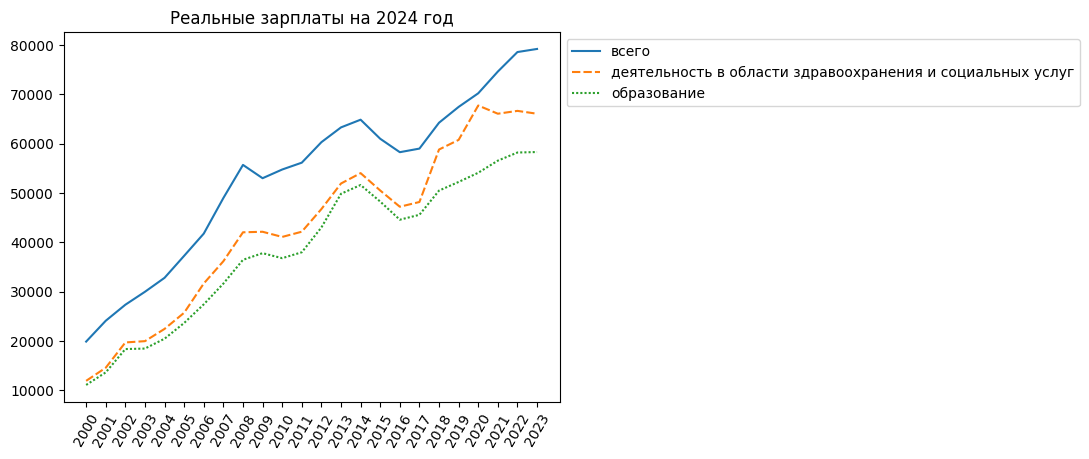

In [111]:
# визуализируем данные с учётом инфляции на 2024 год
plt.title("Реальные зарплаты на 2024 год")
sns.lineplot(sel_df * coef_arr[::-1].reshape(-1, 1))
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left");

Теперь результаты менее однозначные, поскольку мы рассматриваем изменение заработных плат относительно инфляции. Из-за этого графики стабилизировались и рост стал более постепенным. Однако он всё равно остался, что говорит об экономическом росте. В некоторые моменты мы можем наблюдать спад реальных зарплат, что свойственно времени кризиса - это 2009, 2014 и 2020 года.